In [1]:
import spacy
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import tqdm
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
train_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [3]:
test_df = pd.read_csv("test.csv")
test_df.shape

(375806, 2)

In [56]:
spacy_nlp = spacy.load("en")

In [57]:
if 'textcat' not in spacy_nlp.pipe_names:
    textcat = spacy_nlp.create_pipe('textcat')
    spacy_nlp.add_pipe(textcat)

In [58]:
textcat.add_label("POSITIVE")
textcat.labels

('POSITIVE',)

In [59]:
train_texts = train_df.question_text.to_list()
train_labels = train_df.target.to_list()
train_labels = [{'POSITIVE' : bool(label)} for label in train_labels]
train_data = list(zip(train_texts, [{"cats" : cats} for cats in train_labels] ))
train_data

[('How did Quebec nationalists see their province as a nation in the 1960s?',
  {'cats': {'POSITIVE': False}}),
 ('Do you have an adopted dog, how would you encourage people to adopt and not shop?',
  {'cats': {'POSITIVE': False}}),
 ('Why does velocity affect time? Does velocity affect space geometry?',
  {'cats': {'POSITIVE': False}}),
 ('How did Otto von Guericke used the Magdeburg hemispheres?',
  {'cats': {'POSITIVE': False}}),
 ('Can I convert montra helicon D to a mountain bike by just changing the tyres?',
  {'cats': {'POSITIVE': False}}),
 ('Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
  {'cats': {'POSITIVE': False}}),
 ('Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
  {'cats': {'POSITIVE': False}}),
 ('Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
  {'cats': {'POSITIVE': False}}),
 ('Is there such a thing as dressing moderately, and if so, how is that 

In [60]:
other_pipes = [pipe for pipe in spacy_nlp.pipe_names if pipe != 'textcat']
other_pipes

['tagger', 'parser', 'ner']



  0%|          | 0/20 [00:00<?, ?it/s]

0


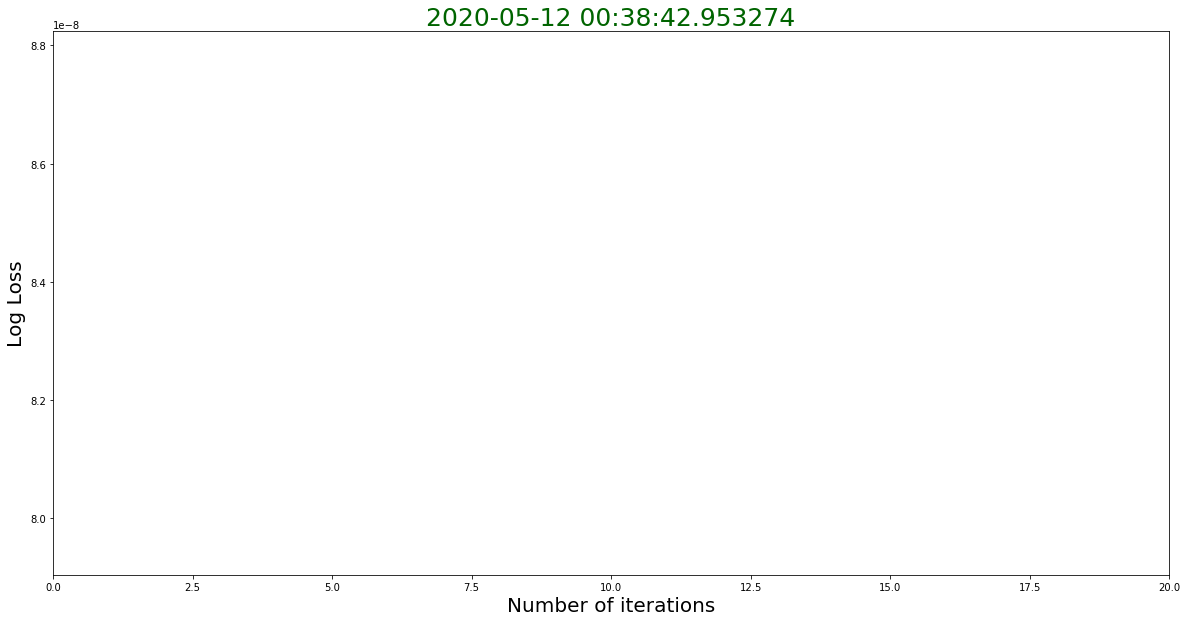



  5%|▌         | 1/20 [20:12<6:23:55, 1212.41s/it]

{'textcat': 8.363995657179046e-08}
1


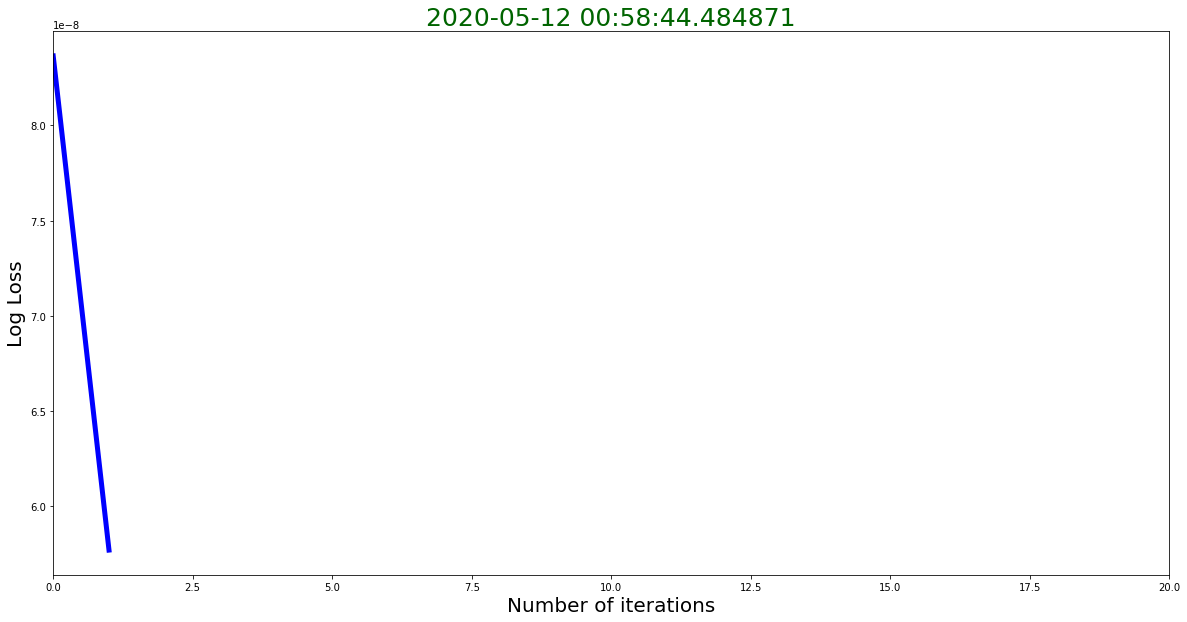



 10%|█         | 2/20 [40:13<6:02:43, 1209.08s/it]

{'textcat': 5.770419211903466e-08}
2


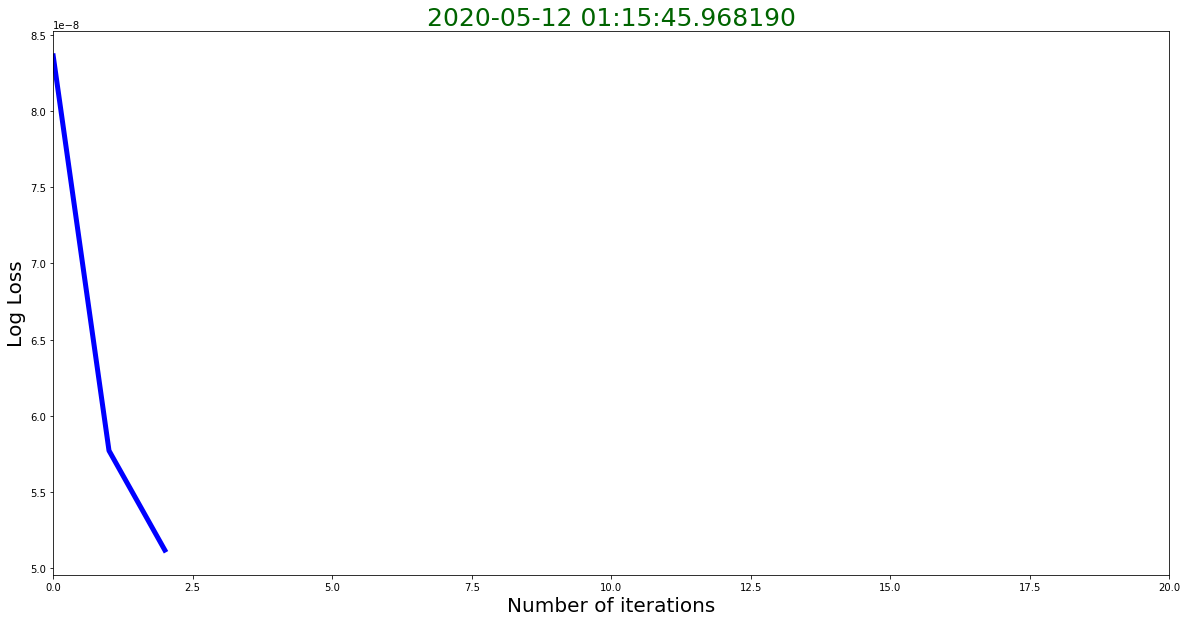



 15%|█▌        | 3/20 [57:15<5:26:37, 1152.80s/it]

{'textcat': 5.1168506737253594e-08}
3


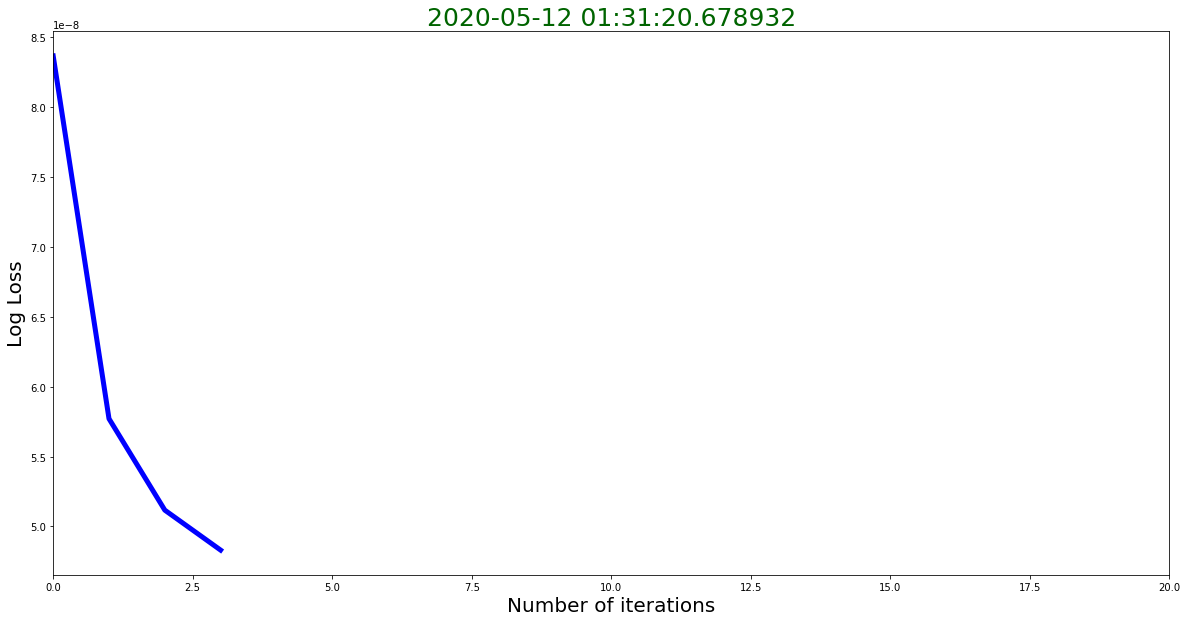



 20%|██        | 4/20 [1:12:49<4:49:58, 1087.38s/it]

{'textcat': 4.831185335119059e-08}
4


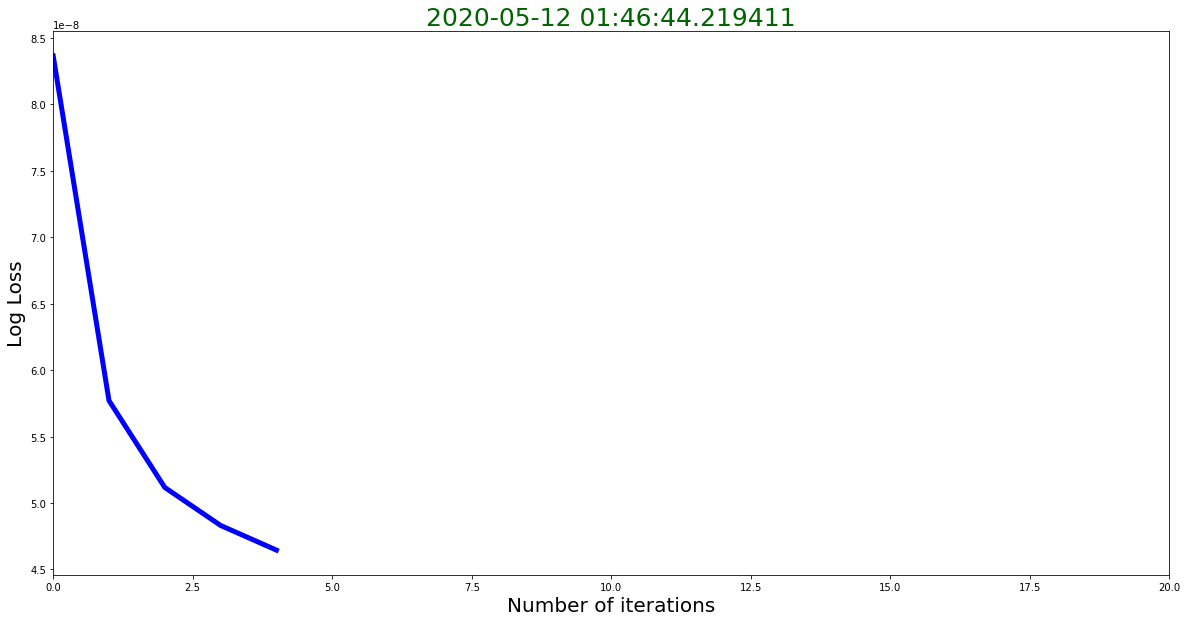



 25%|██▌       | 5/20 [1:28:13<4:19:33, 1038.26s/it]

{'textcat': 4.645757623045199e-08}
5


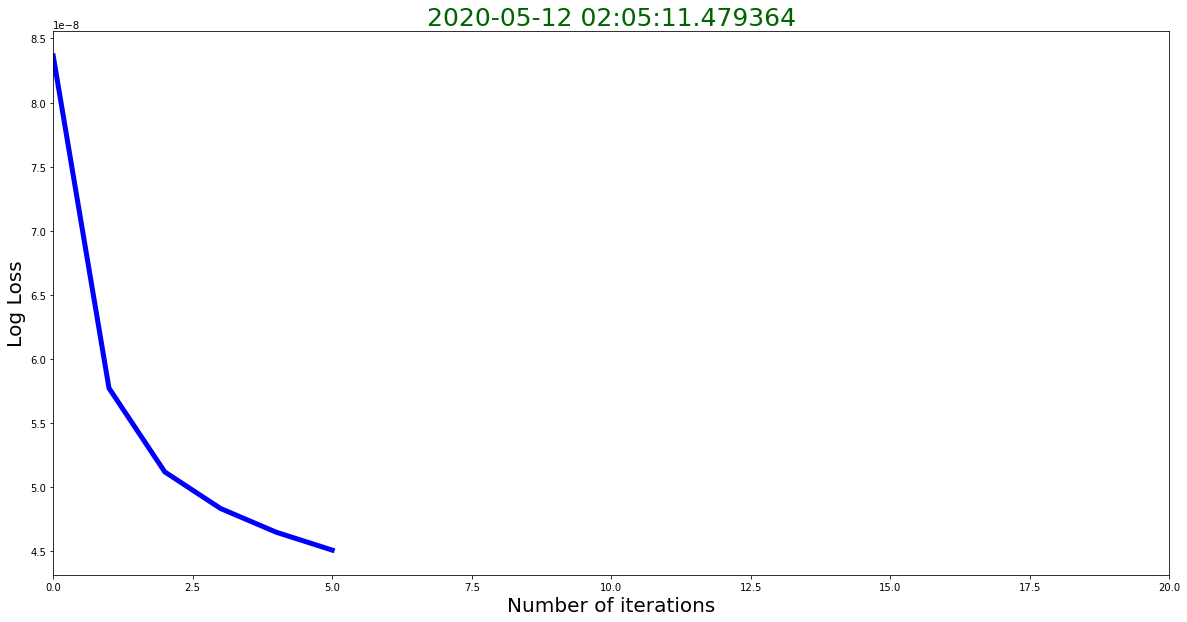



 30%|███       | 6/20 [1:46:40<4:07:05, 1058.99s/it]

{'textcat': 4.506681230975751e-08}
6


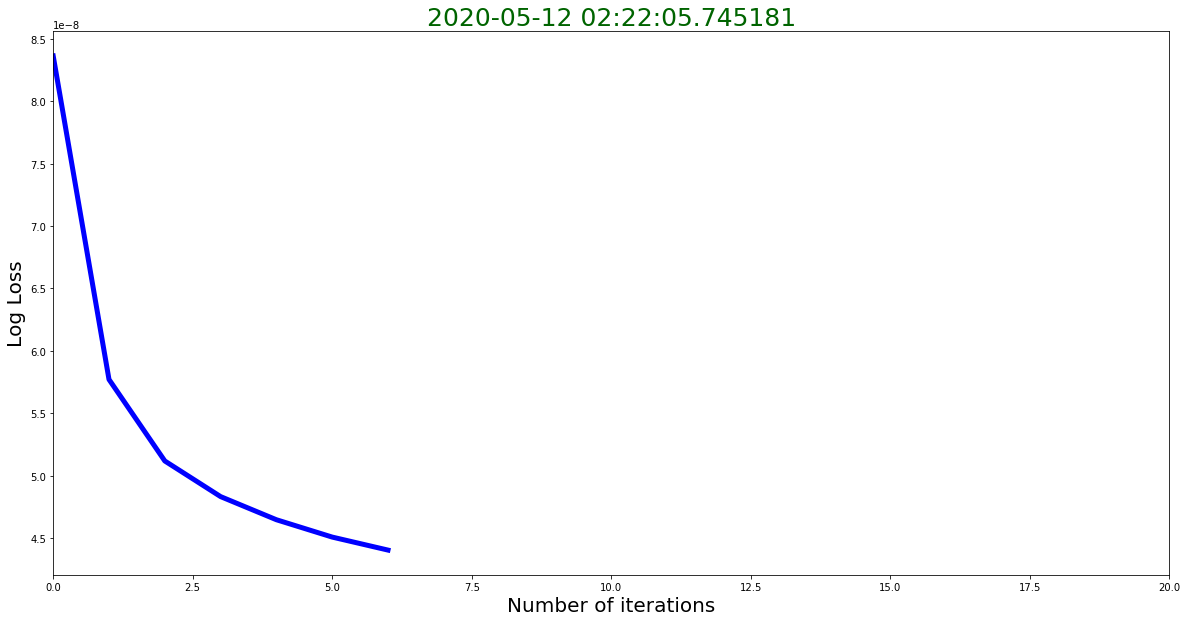



 35%|███▌      | 7/20 [2:03:35<3:46:32, 1045.55s/it]

{'textcat': 4.4023765688461225e-08}
7


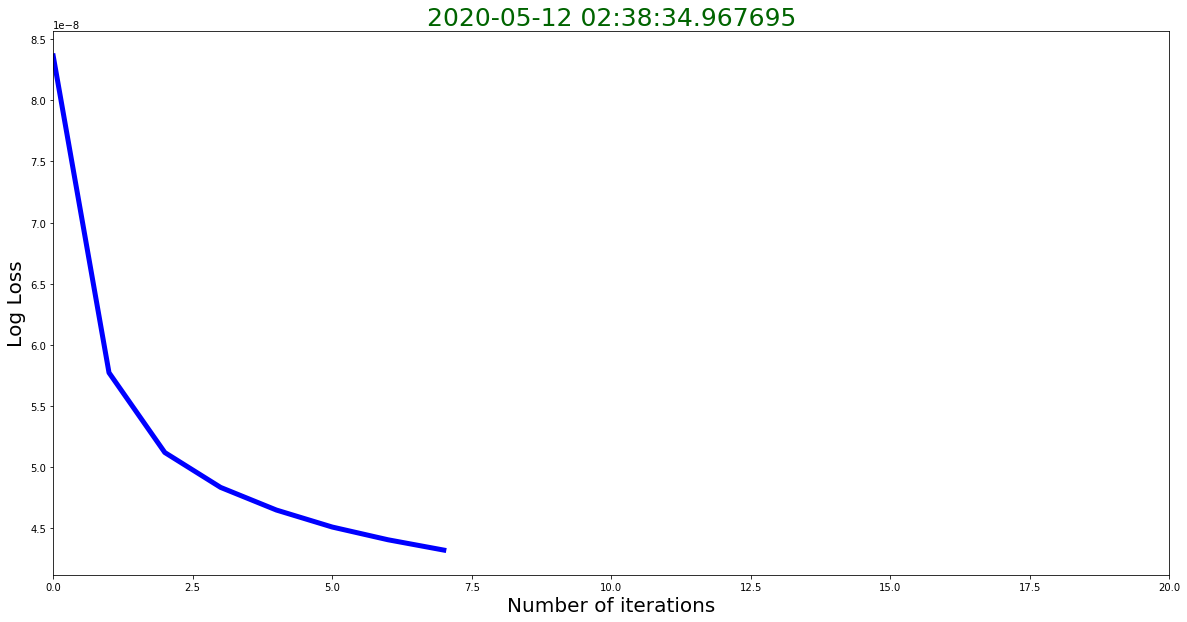



 40%|████      | 8/20 [2:20:04<3:25:43, 1028.60s/it]

{'textcat': 4.3178514208541685e-08}
8


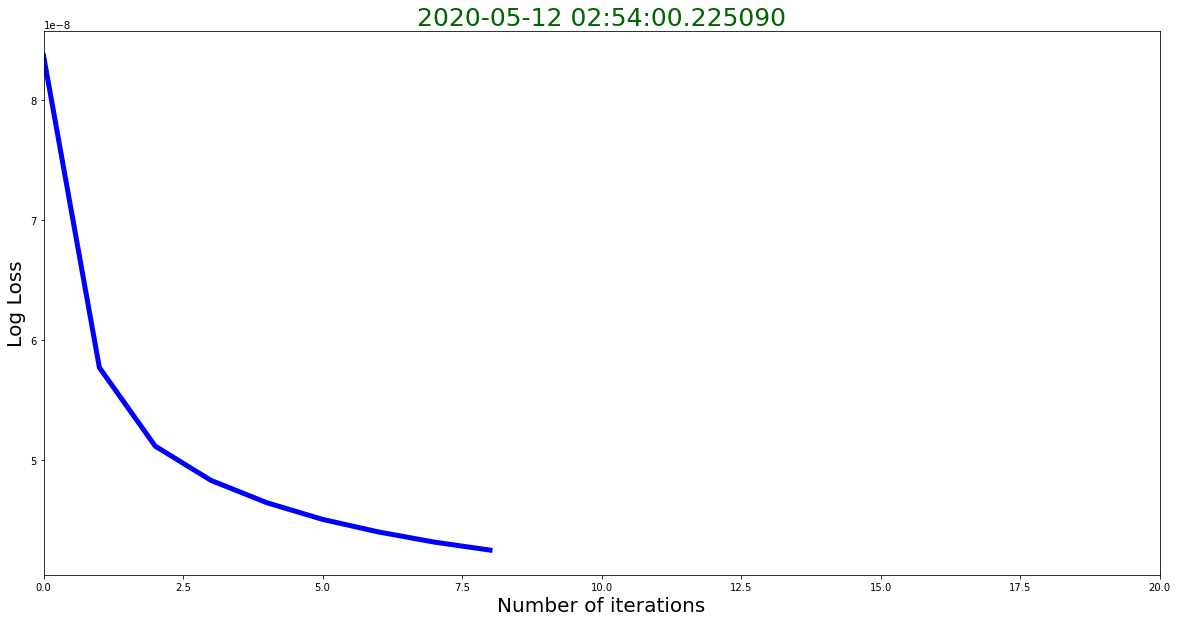



 45%|████▌     | 9/20 [2:35:29<3:02:53, 997.59s/it] 

{'textcat': 4.2511555053970085e-08}
9


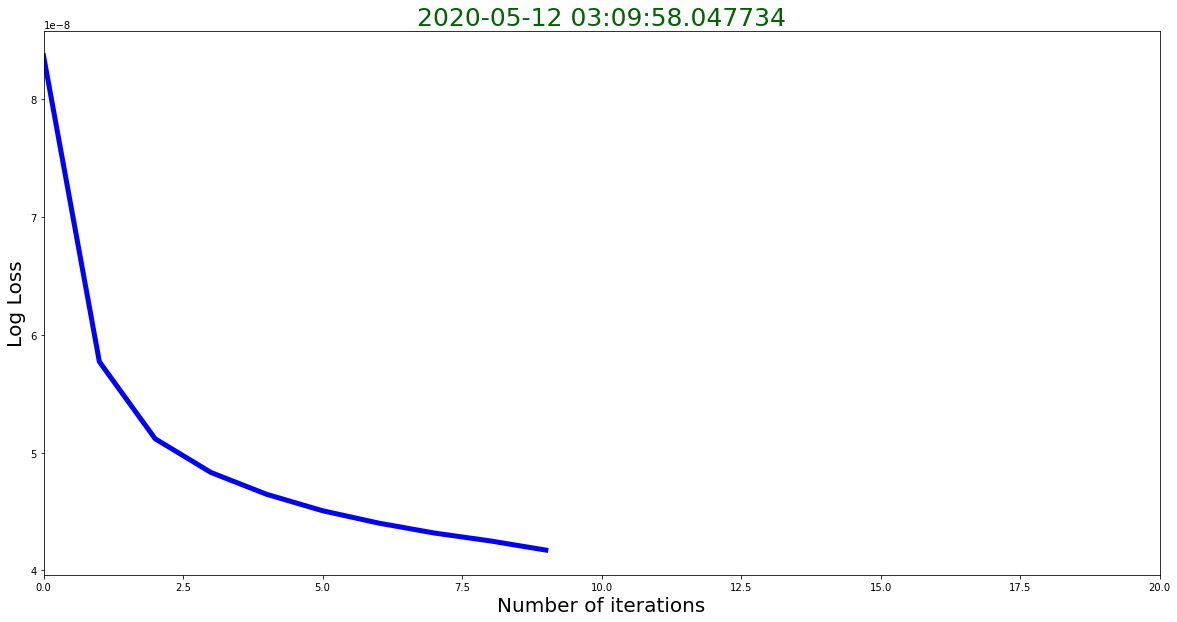



 50%|█████     | 10/20 [2:51:27<2:44:16, 985.66s/it]

{'textcat': 4.172966383553245e-08}
10


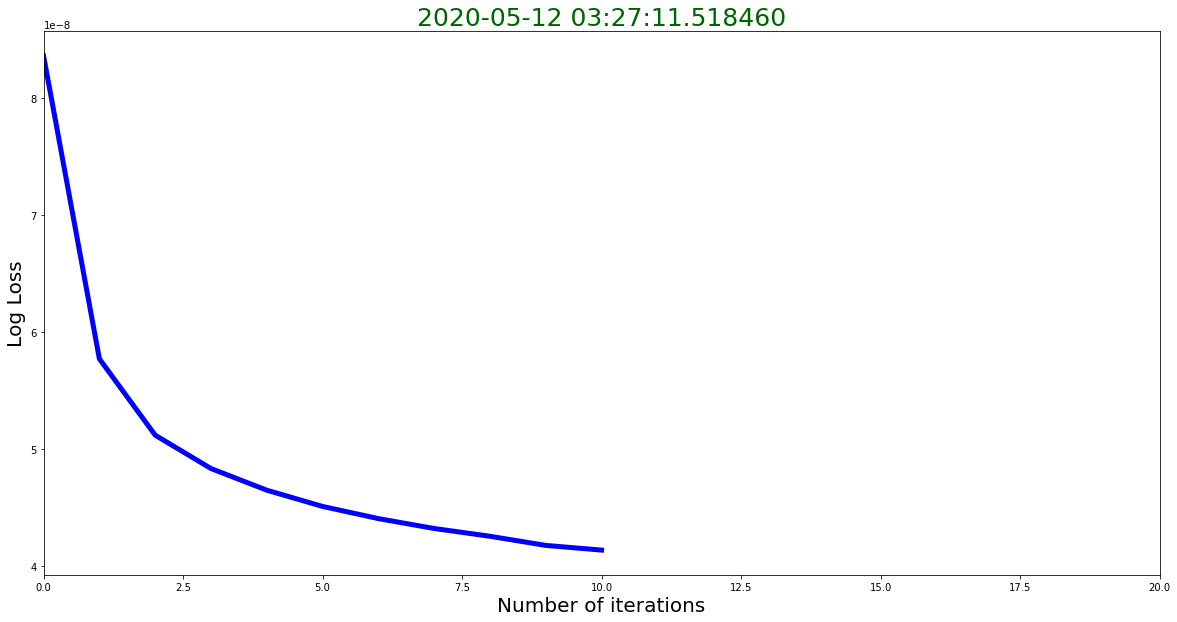



 55%|█████▌    | 11/20 [3:08:40<2:30:00, 1000.01s/it]

{'textcat': 4.132872871709381e-08}
11


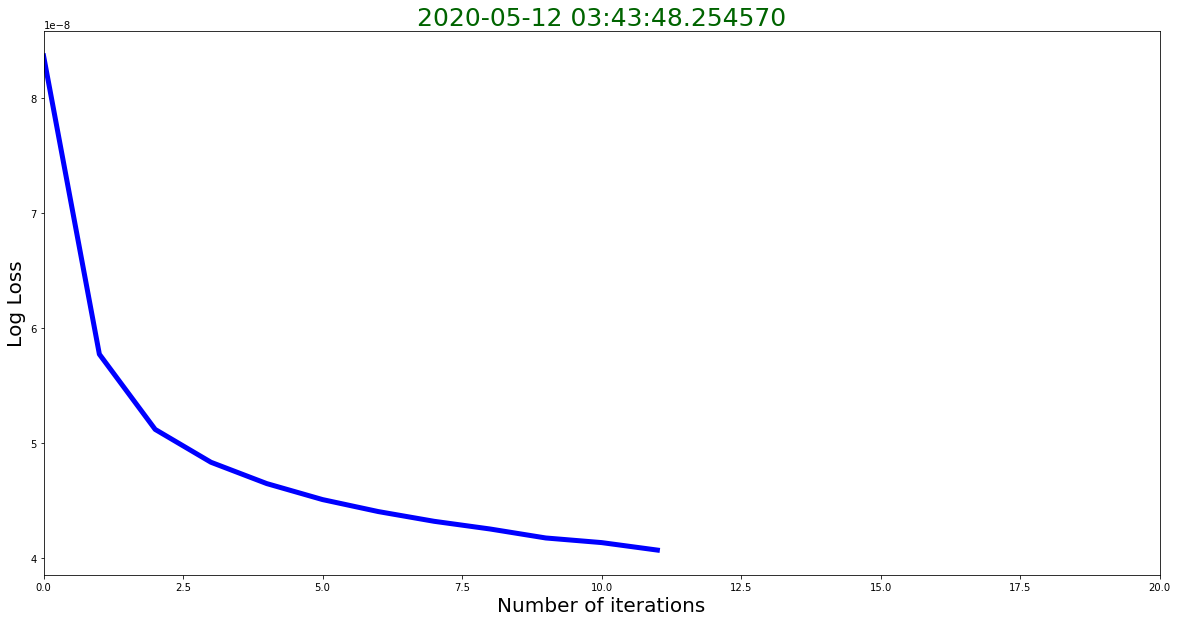



 60%|██████    | 12/20 [3:25:17<2:13:12, 999.07s/it] 

{'textcat': 4.067639319815797e-08}
12


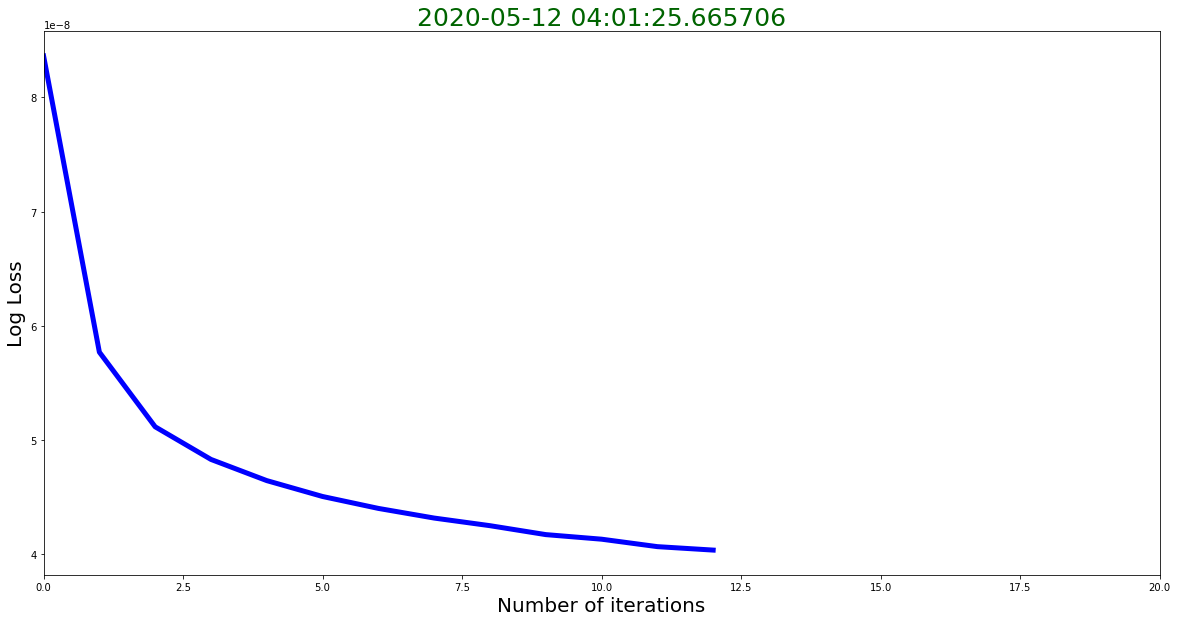



 65%|██████▌   | 13/20 [3:42:55<1:58:36, 1016.58s/it]

{'textcat': 4.037430734182834e-08}
13


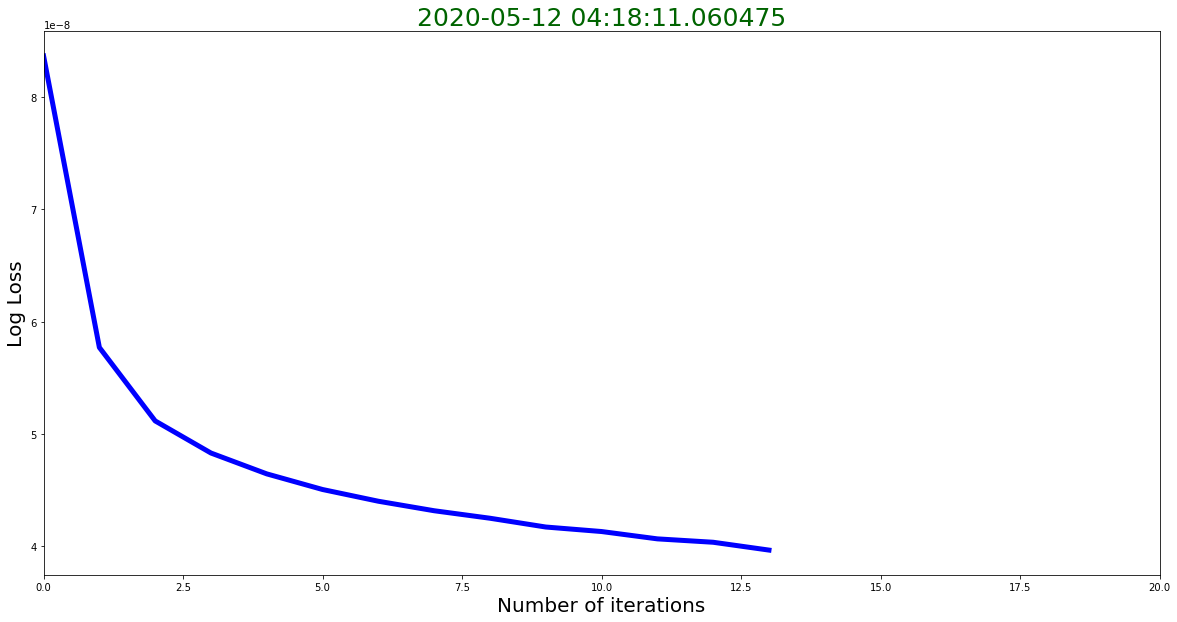



 70%|███████   | 14/20 [3:59:40<1:41:19, 1013.18s/it]

{'textcat': 3.96776703437407e-08}
14


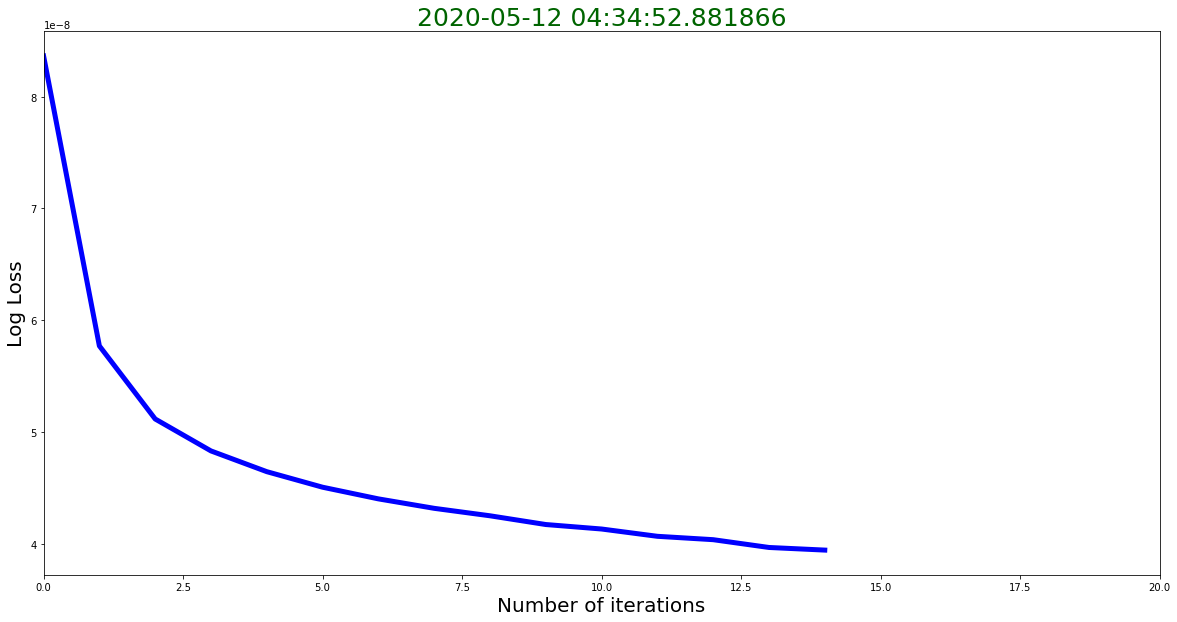



 75%|███████▌  | 15/20 [4:16:22<1:24:09, 1009.83s/it]

{'textcat': 3.944334855954246e-08}
15


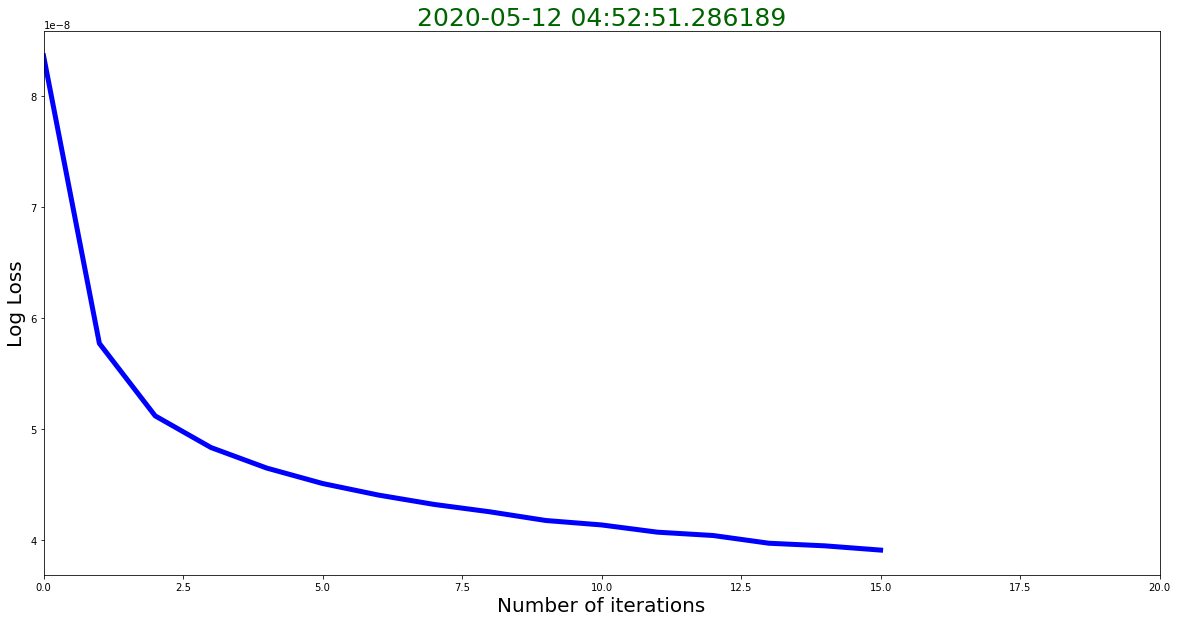



 80%|████████  | 16/20 [4:34:20<1:08:41, 1030.34s/it]

{'textcat': 3.905970302753303e-08}
16


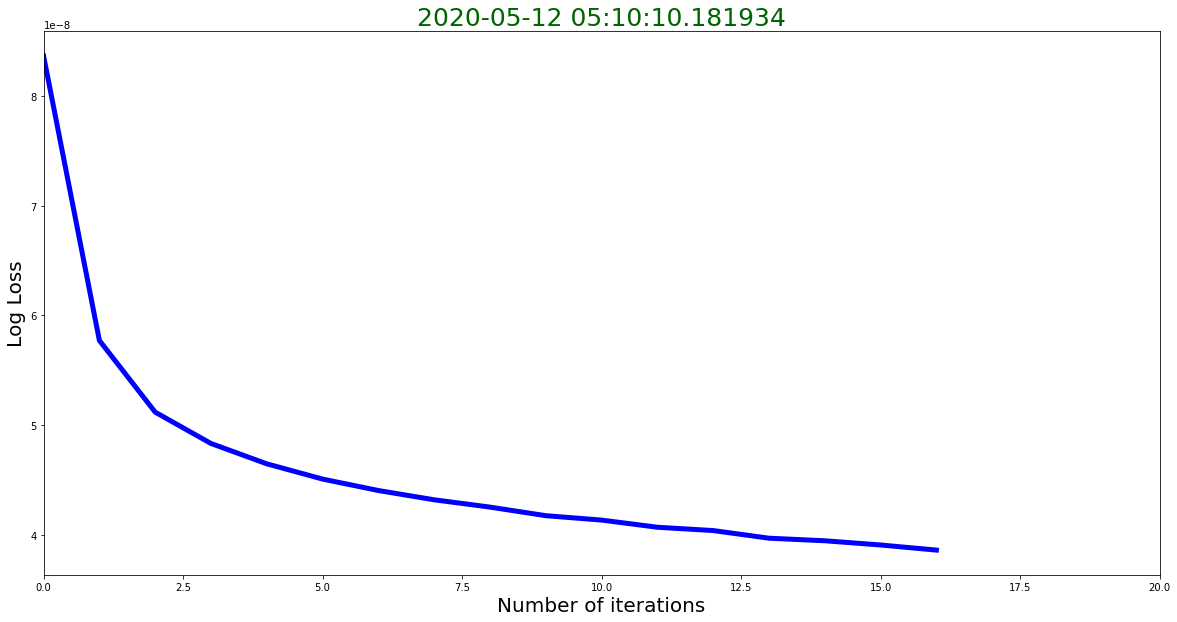



 85%|████████▌ | 17/20 [4:51:39<51:38, 1032.92s/it]  

{'textcat': 3.8593517937002275e-08}
17


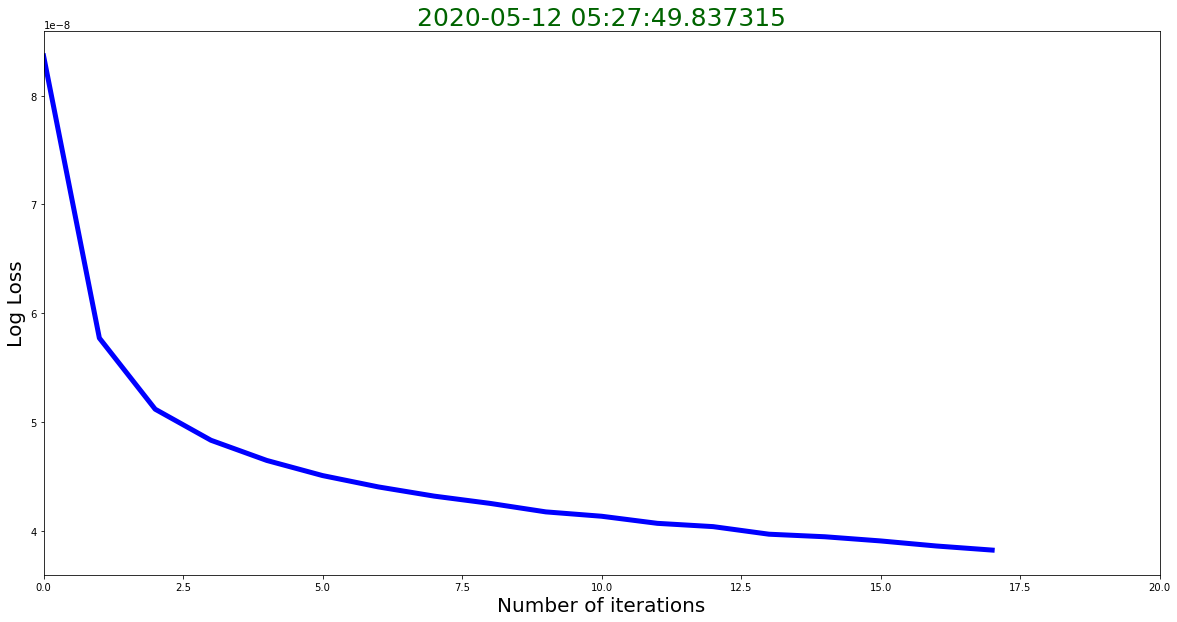



 90%|█████████ | 18/20 [5:09:19<34:41, 1040.92s/it]

{'textcat': 3.821749303134503e-08}
18


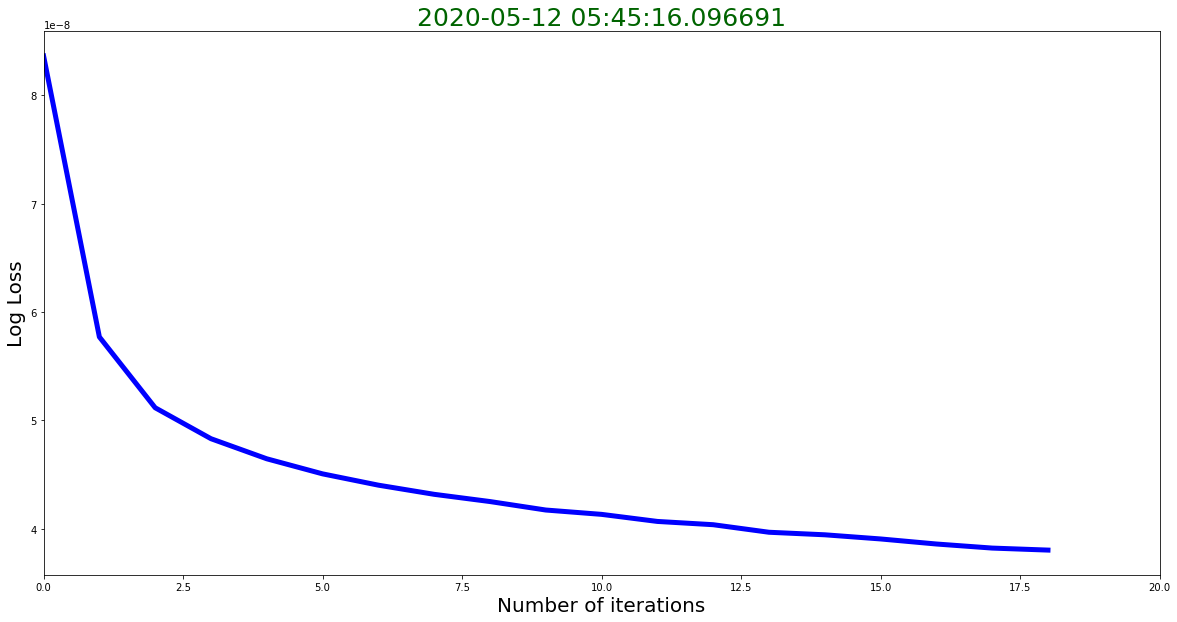



 95%|█████████▌| 19/20 [5:26:45<17:22, 1042.57s/it]

{'textcat': 3.803162751392364e-08}
19


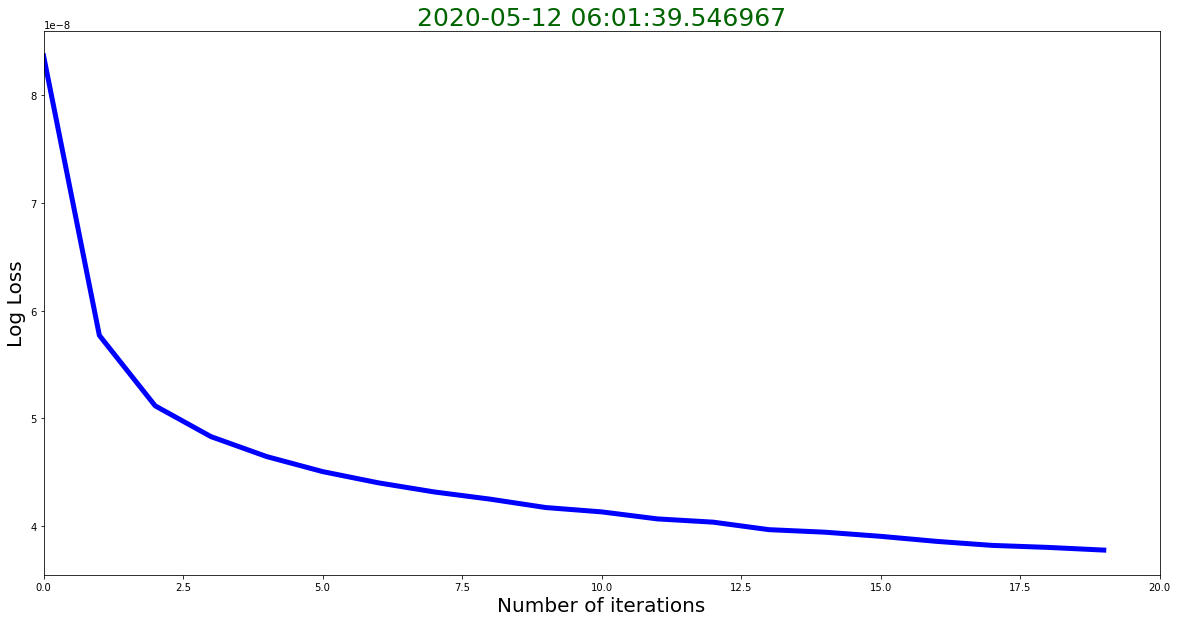



100%|██████████| 20/20 [5:43:08<00:00, 1029.44s/it]

{'textcat': 3.778214227589949e-08}


In [61]:
with spacy_nlp.disable_pipes(other_pipes):
    optimizer = spacy_nlp.begin_training()
    loss_data = []
    for i in tqdm.tqdm(range(20)):
        print(i)
        random.shuffle(train_data)
        losses = {}
        for batch in spacy.util.minibatch(train_data, size=10000):
            texts, annotations = zip(*batch)
            spacy_nlp.update(texts, annotations, sgd=optimizer, drop =0.2, losses = losses)
        loss_data.append(losses['textcat'])
        fig = plt.figure(figsize = (20, 10))
        ax = fig.add_subplot(111)
        ax.set_title(datetime.today(), fontsize = 25, color = 'darkgreen')
        ax.plot(np.arange(i + 1), loss_data, linewidth = 5, color = 'blue')
        ax.set_xlim([0, 20])
        ax.set_xlabel("Number of iterations", fontsize = 20)
        ax.set_ylabel("Log Loss", fontsize = 20)
        plt.show()
        print(losses)

In [62]:
spacy_nlp.to_disk("Model")

In [4]:
nlp = spacy.load("Model")

In [5]:
test_df["target"] = test_df.question_text.apply(lambda text : 1 if nlp(text).cats['POSITIVE'] > 0.5 else 0)

In [6]:
# for i in range(100):
#     if nlp(test_df.question_text[i]).cats['POSITIVE'] > 0.5:
#         print(test_df.question_text[i])
test_df

,qid,question_text,target
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,1
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,0
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,0
3,000086e4b7e1c7146103,Who are entrepreneurs?,0
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,0
...,...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...,0
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...,0
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...,0
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?,0


In [8]:
test_df.drop(['question_text'], axis = 1)

,qid,target
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
test_df.to_